In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [3]:
df = pd.read_csv('dataset/new_Basket_2_2009.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
4,United Kingdom,13085.0,PINK DOUGHNUT TRINKET POT,489434,2009-01-12 07:45:00,1.65,24,22064
...,...,...,...,...,...,...,...,...
37402,United Kingdom,17867.0,REX CASH+CARRY JUMBO SHOPPER,493407,2009-12-23 16:04:00,0.95,10,21034
37403,United Kingdom,17841.0,CRYSTAL STUD EARRINGS ASSORTED COL,493408,2009-12-23 16:21:00,0.38,1,90058B
37404,United Kingdom,17841.0,PINK VINTAGE PAISLEY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21933
37405,United Kingdom,17841.0,STRAWBERRY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21937


In [3]:
#number of distinct session for Customer 
Nsessions = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
Nsessions.columns = ['Customer ID', 'Nsessions']
Nsessions

,Customer ID,Nsessions
0,12346.0,5
1,12358.0,1
2,12359.0,2
3,12417.0,2
4,12422.0,1
...,...,...
904,18268.0,1
905,18271.0,1
906,18275.0,1
907,18276.0,1


In [4]:
df = df.astype({'Price': 'float'})

In [5]:
#Tot spent for customer in the period of osservation
TotSpent = df.groupby('Customer ID', as_index=False)['Price'].sum()
TotSpent.columns = ['Customer ID', 'TotSpent']
TotSpent

,Customer ID,TotSpent
0,12346.0,19.00
1,12358.0,35.89
2,12359.0,97.14
3,12417.0,47.15
4,12422.0,6.65
...,...,...
904,18268.0,37.17
905,18271.0,26.55
906,18275.0,20.65
907,18276.0,24.70


In [6]:
#Avg spent for customer in a session
avgSpent = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].mean()
avgSpent.columns = ['Customer ID', 'avgSpent']
avgSpent

,Customer ID,avgSpent
0,12346.0,3.800
1,12358.0,35.890
2,12359.0,48.570
3,12417.0,23.575
4,12422.0,6.650
...,...,...
904,18268.0,37.170
905,18271.0,26.550
906,18275.0,20.650
907,18276.0,24.700


In [7]:
#Maximum spent by a customer in a Session
Max = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].max()
Max.columns = ['Customer ID', 'Max']
Max

,Customer ID,Max
0,12346.0,4.50
1,12358.0,35.89
2,12359.0,96.29
3,12417.0,46.30
4,12422.0,6.65
...,...,...
904,18268.0,37.17
905,18271.0,26.55
906,18275.0,20.65
907,18276.0,24.70


In [8]:
#Minimum spent by a customer in a Session
Min = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].min()
Min.columns = ['Customer ID', 'Min']
Min

,Customer ID,Min
0,12346.0,1.00
1,12358.0,35.89
2,12359.0,0.85
3,12417.0,0.85
4,12422.0,6.65
...,...,...
904,18268.0,37.17
905,18271.0,26.55
906,18275.0,20.65
907,18276.0,24.70


In [9]:
#Number of distinct item for customer
DistinctItem = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
DistinctItem.columns = ['Customer ID', 'DistinctItem']
DistinctItem

,Customer ID,DistinctItem
0,12346.0,2
1,12358.0,9
2,12359.0,28
3,12417.0,17
4,12422.0,5
...,...,...
904,18268.0,12
905,18271.0,8
906,18275.0,7
907,18276.0,15


In [10]:
#Tot item for each customer
TotItem = df.groupby('Customer ID', as_index=False)['Quantity'].sum()
TotItem.columns = ['Customer ID', 'TotItem']
TotItem

,Customer ID,TotItem
0,12346.0,26
1,12358.0,91
2,12359.0,194
3,12417.0,149
4,12422.0,60
...,...,...
904,18268.0,142
905,18271.0,44
906,18275.0,128
907,18276.0,192


In [11]:
#New Dataset
Customer_2009 =TotItem.merge(avgSpent, on='Customer ID').merge(Nsessions, on='Customer ID').merge(TotSpent, on='Customer ID').merge(Max, on='Customer ID').merge(Min, on='Customer ID').merge(DistinctItem, on='Customer ID').set_index('Customer ID')

In [12]:
Customer_2009

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
Customer ID,,,,,,,
12346.0,26,3.800,5,19.00,4.50,1.00,2
12358.0,91,35.890,1,35.89,35.89,35.89,9
12359.0,194,48.570,2,97.14,96.29,0.85,28
12417.0,149,23.575,2,47.15,46.30,0.85,17
12422.0,60,6.650,1,6.65,6.65,6.65,5
...,...,...,...,...,...,...,...
18268.0,142,37.170,1,37.17,37.17,37.17,12
18271.0,44,26.550,1,26.55,26.55,26.55,8
18275.0,128,20.650,1,20.65,20.65,20.65,7


In [13]:
df=Customer_2009

In [14]:
df

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
Customer ID,,,,,,,
12346.0,26,3.800,5,19.00,4.50,1.00,2
12358.0,91,35.890,1,35.89,35.89,35.89,9
12359.0,194,48.570,2,97.14,96.29,0.85,28
12417.0,149,23.575,2,47.15,46.30,0.85,17
12422.0,60,6.650,1,6.65,6.65,6.65,5
...,...,...,...,...,...,...,...
18268.0,142,37.170,1,37.17,37.17,37.17,12
18271.0,44,26.550,1,26.55,26.55,26.55,8
18275.0,128,20.650,1,20.65,20.65,20.65,7


In [15]:
df.to_csv('D:/Desktop/DataMining/Customer_2009.csv')

In [6]:
df = pd.read_csv('dataset/new_Basket_2_2010.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,12346.0,This is a test product.,493410,2010-04-01 09:24:00,4.50,5,TEST001
1,United Kingdom,12346.0,This is a test product.,493412,2010-04-01 09:53:00,4.50,5,TEST001
2,United Kingdom,17841.0,PANDA AND BUNNIES STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21724
3,United Kingdom,17841.0,ELEPHANT TOY WITH BLUE T-SHIRT,493413,2010-04-01 09:54:00,3.75,1,84578
4,United Kingdom,17841.0,ALPHABET HEARTS STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21723
...,...,...,...,...,...,...,...,...
414684,United Kingdom,17841.0,4 WILDFLOWER BOTANICAL CANDLES,539991,2010-12-23 16:49:00,1.25,1,21618
414685,United Kingdom,17841.0,GRAND CHOCOLATECANDLE,539991,2010-12-23 16:49:00,1.45,4,72741
414686,United Kingdom,17841.0,FLOWER VINE RAFFIA FOOD COVER,539992,2010-12-23 17:41:00,3.75,1,21470
414687,United Kingdom,17841.0,FELT FARM ANIMAL RABBIT,539992,2010-12-23 17:41:00,1.25,1,22258


In [18]:
#number of distinct session for Customer 
Nsessions = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
Nsessions.columns = ['Customer ID', 'Nsessions']
Nsessions

,Customer ID,Nsessions
0,12346.0,6
1,12347.0,2
2,12348.0,2
3,12349.0,2
4,12351.0,1
...,...,...
4065,18285.0,1
4066,18286.0,1
4067,18287.0,4
4068,18300.0,2


In [19]:
#Tot spent for customer in the period of osservation
TotSpent = df.groupby('Customer ID', as_index=False)['Price'].sum()
TotSpent.columns = ['Customer ID', 'TotSpent']
TotSpent

,Customer ID,TotSpent
0,12346.0,187.36
1,12347.0,148.30
2,12348.0,16.59
3,12349.0,276.99
4,12351.0,36.71
...,...,...
4065,18285.0,24.20
4066,18286.0,111.89
4067,18287.0,149.70
4068,18300.0,119.75


In [20]:
#Avg spent for customer in a session
avgSpent = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].mean()
avgSpent.columns = ['Customer ID', 'avgSpent']
avgSpent

,Customer ID,avgSpent
0,12346.0,31.226667
1,12347.0,74.150000
2,12348.0,8.295000
3,12349.0,138.495000
4,12351.0,36.710000
...,...,...
4065,18285.0,24.200000
4066,18286.0,111.890000
4067,18287.0,37.425000
4068,18300.0,59.875000


In [21]:
#Maximum spent by a customer in a Session
Max = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].max()
Max.columns = ['Customer ID', 'Max']
Max

,Customer ID,Max
0,12346.0,142.31
1,12347.0,87.69
2,12348.0,14.39
3,12349.0,163.76
4,12351.0,36.71
...,...,...
4065,18285.0,24.20
4066,18286.0,111.89
4067,18287.0,100.45
4068,18300.0,80.40


In [22]:
#Minimum spent by a customer in a Session
Min = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].min()
Min.columns = ['Customer ID', 'Min']
Min

,Customer ID,Min
0,12346.0,4.50
1,12347.0,60.61
2,12348.0,2.20
3,12349.0,113.23
4,12351.0,36.71
...,...,...
4065,18285.0,24.20
4066,18286.0,111.89
4067,18287.0,5.10
4068,18300.0,39.35


In [23]:
#Minimum spent by a customer in a Session
Min = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].min()
Min.columns = ['Customer ID', 'Min']
Min

,Customer ID,Min
0,12346.0,4.50
1,12347.0,60.61
2,12348.0,2.20
3,12349.0,113.23
4,12351.0,36.71
...,...,...
4065,18285.0,24.20
4066,18286.0,111.89
4067,18287.0,5.10
4068,18300.0,39.35


In [24]:
#Number of distinct item for customer
DistinctItem = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
DistinctItem.columns = ['Customer ID', 'DistinctItem']
DistinctItem

,Customer ID,DistinctItem
0,12346.0,25
1,12347.0,67
2,12348.0,20
3,12349.0,77
4,12351.0,20
...,...,...
4065,18285.0,8
4066,18286.0,45
4067,18287.0,62
4068,18300.0,41


In [25]:
#Tot item for each customer
TotItem = df.groupby('Customer ID', as_index=False)['Quantity'].sum()
TotItem.columns = ['Customer ID', 'TotItem']
TotItem

,Customer ID,TotItem
0,12346.0,44
1,12347.0,759
2,12348.0,469
3,12349.0,914
4,12351.0,260
...,...,...
4065,18285.0,58
4066,18286.0,417
4067,18287.0,731
4068,18300.0,626


In [26]:
#New Dataset
Customer_2010 =TotItem.merge(avgSpent, on='Customer ID').merge(Nsessions, on='Customer ID').merge(TotSpent, on='Customer ID').merge(Max, on='Customer ID').merge(Min, on='Customer ID').merge(DistinctItem, on='Customer ID').set_index('Customer ID')

In [28]:
Customer_2010

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
Customer ID,,,,,,,
12346.0,44,31.226667,6,187.36,142.31,4.50,25
12347.0,759,74.150000,2,148.30,87.69,60.61,67
12348.0,469,8.295000,2,16.59,14.39,2.20,20
12349.0,914,138.495000,2,276.99,163.76,113.23,77
12351.0,260,36.710000,1,36.71,36.71,36.71,20
...,...,...,...,...,...,...,...
18285.0,58,24.200000,1,24.20,24.20,24.20,8
18286.0,417,111.890000,1,111.89,111.89,111.89,45
18287.0,731,37.425000,4,149.70,100.45,5.10,62


In [29]:
df=Customer_2010

In [30]:
df.to_csv('D:/Desktop/DataMining/Customer_2010.csv')

In [8]:
df = pd.read_csv('dataset/new_Basket_2_2011.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13313.0,JUMBO BAG PINK POLKADOT,539993,2011-04-01 10:00:00,1.95,10,22386
1,United Kingdom,13313.0,BLUE POLKADOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21499
2,United Kingdom,13313.0,RED RETROSPOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21498
3,United Kingdom,13313.0,RECYCLING BAG RETROSPOT,539993,2011-04-01 10:00:00,2.10,5,22379
4,United Kingdom,13313.0,RED RETROSPOT SHOPPER BAG,539993,2011-04-01 10:00:00,1.25,10,20718
...,...,...,...,...,...,...,...,...
426351,France,12680.0,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
426352,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
426353,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
426354,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


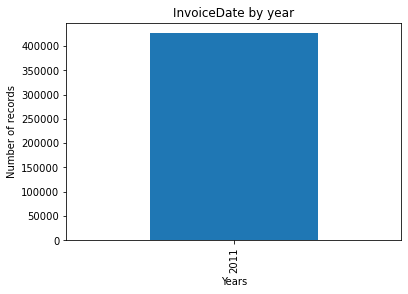

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].groupby(df.InvoiceDate.dt.year).agg('count').plot(kind="bar")
plt.title("InvoiceDate by year")
plt.xlabel("Years")
plt.ylabel("Number of records")
plt.show()

In [5]:
#number of distinct session for Customer 
Nsessions = df.groupby('Customer ID')['Invoice'].nunique().reset_index()
Nsessions.columns = ['Customer ID', 'Nsessions']
Nsessions

,Customer ID,Nsessions
0,12347.0,6
1,12348.0,2
2,12349.0,1
3,12350.0,1
4,12352.0,7
...,...,...
4077,18281.0,1
4078,18282.0,2
4079,18283.0,16
4080,18287.0,3


In [6]:
#Tot spent for customer in the period of osservation
TotSpent = df.groupby('Customer ID', as_index=False)['Price'].sum()
TotSpent.columns = ['Customer ID', 'TotSpent']
TotSpent

,Customer ID,TotSpent
0,12347.0,310.39
1,12348.0,1.70
2,12349.0,200.75
3,12350.0,25.30
4,12352.0,214.51
...,...,...
4077,18281.0,5.46
4078,18282.0,23.85
4079,18283.0,1131.43
4080,18287.0,76.44


In [7]:
#Avg spent for customer in a session
avgSpent = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].mean()
avgSpent.columns = ['Customer ID', 'avgSpent']
avgSpent

,Customer ID,avgSpent
0,12347.0,51.731667
1,12348.0,0.850000
2,12349.0,200.750000
3,12350.0,25.300000
4,12352.0,30.644286
...,...,...
4077,18281.0,5.460000
4078,18282.0,11.925000
4079,18283.0,70.714375
4080,18287.0,25.480000


In [8]:
#Maximum spent by a customer in a Session
Max = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].max()
Max.columns = ['Customer ID', 'Max']
Max

,Customer ID,Max
0,12347.0,92.67
1,12348.0,0.85
2,12349.0,200.75
3,12350.0,25.30
4,12352.0,53.20
...,...,...
4077,18281.0,5.46
4078,18282.0,13.08
4079,18283.0,124.18
4080,18287.0,41.37


In [9]:
#Minimum spent by a customer in a Session
Min = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Price'].sum()[['Customer ID', 'Price']].groupby('Customer ID', as_index=False)['Price'].min()
Min.columns = ['Customer ID', 'Min']
Min

,Customer ID,Min
0,12347.0,13.54
1,12348.0,0.85
2,12349.0,200.75
3,12350.0,25.30
4,12352.0,12.55
...,...,...
4077,18281.0,5.46
4078,18282.0,10.77
4079,18283.0,1.25
4080,18287.0,0.29


In [10]:
#Number of distinct item for customer
DistinctItem = df.groupby('Customer ID')['StockCode'].nunique().reset_index()
DistinctItem.columns = ['Customer ID', 'DistinctItem']
DistinctItem

,Customer ID,DistinctItem
0,12347.0,82
1,12348.0,2
2,12349.0,64
3,12350.0,16
4,12352.0,50
...,...,...
4077,18281.0,5
4078,18282.0,8
4079,18283.0,259
4080,18287.0,46


In [11]:
#Tot item for each customer
TotItem = df.groupby('Customer ID', as_index=False)['Quantity'].sum()
TotItem.columns = ['Customer ID', 'TotItem']
TotItem

,Customer ID,TotItem
0,12347.0,1652
1,12348.0,44
2,12349.0,547
3,12350.0,196
4,12352.0,502
...,...,...
4077,18281.0,52
4078,18282.0,51
4079,18283.0,1353
4080,18287.0,778


In [12]:
#New Dataset
Customer_2010 =TotItem.merge(avgSpent, on='Customer ID').merge(Nsessions, on='Customer ID').merge(TotSpent, on='Customer ID').merge(Max, on='Customer ID').merge(Min, on='Customer ID').merge(DistinctItem, on='Customer ID').set_index('Customer ID')

In [13]:
df=Customer_2010
df

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
Customer ID,,,,,,,
12347.0,1652,51.731667,6,310.39,92.67,13.54,82
12348.0,44,0.850000,2,1.70,0.85,0.85,2
12349.0,547,200.750000,1,200.75,200.75,200.75,64
12350.0,196,25.300000,1,25.30,25.30,25.30,16
12352.0,502,30.644286,7,214.51,53.20,12.55,50
...,...,...,...,...,...,...,...
18281.0,52,5.460000,1,5.46,5.46,5.46,5
18282.0,51,11.925000,2,23.85,13.08,10.77,8
18283.0,1353,70.714375,16,1131.43,124.18,1.25,259


In [14]:
df.to_csv('D:/Desktop/DataMining/Customer_2011.csv')

In [16]:
df = pd.read_csv('dataset/new_Basket_2_2009.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
4,United Kingdom,13085.0,PINK DOUGHNUT TRINKET POT,489434,2009-01-12 07:45:00,1.65,24,22064
...,...,...,...,...,...,...,...,...
37402,United Kingdom,17867.0,REX CASH+CARRY JUMBO SHOPPER,493407,2009-12-23 16:04:00,0.95,10,21034
37403,United Kingdom,17841.0,CRYSTAL STUD EARRINGS ASSORTED COL,493408,2009-12-23 16:21:00,0.38,1,90058B
37404,United Kingdom,17841.0,PINK VINTAGE PAISLEY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21933
37405,United Kingdom,17841.0,STRAWBERRY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21937


In [20]:
#Maximum amout of item by a customer in a Session
MaxItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].max()
MaxItem.columns = ['Customer ID', 'MaxItem']
MaxItem

,Customer ID,MaxItem
0,12346.0,10
1,12358.0,91
2,12359.0,182
3,12417.0,139
4,12422.0,60
...,...,...
904,18268.0,142
905,18271.0,44
906,18275.0,128
907,18276.0,192


In [21]:
#Min amout of item by a customer in a Session
MinItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].min()
MinItem.columns = ['Customer ID', 'MinItem']
MinItem

,Customer ID,MinItem
0,12346.0,1
1,12358.0,91
2,12359.0,12
3,12417.0,10
4,12422.0,60
...,...,...
904,18268.0,142
905,18271.0,44
906,18275.0,128
907,18276.0,192


In [22]:
#Avg item spent for customer in a session
avgSpentItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].mean()
avgSpentItem.columns = ['Customer ID', 'avgSpentItem']
avgSpentItem

,Customer ID,avgSpentItem
0,12346.0,5.2
1,12358.0,91.0
2,12359.0,97.0
3,12417.0,74.5
4,12422.0,60.0
...,...,...
904,18268.0,142.0
905,18271.0,44.0
906,18275.0,128.0
907,18276.0,192.0


In [11]:
df['InvoiceDate']=df['InvoiceDate'].dt.month

In [19]:
#Avg spent for customer per month

avgSpentMonth = df.groupby(['Customer ID', 'Invoice','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID'], as_index=False)['Price'].sum()
avgSpentMonth.columns = ['Customer ID', 'avgSpentMonth']
avgSpentMonth['avgSpentMonth']=avgSpentMonth['avgSpentMonth']/12
avgSpentMonth

,Customer ID,avgSpentMonth
0,12346.0,1.583333
1,12358.0,2.990833
2,12359.0,8.095000
3,12417.0,3.929167
4,12422.0,0.554167
...,...,...
904,18268.0,3.097500
905,18271.0,2.212500
906,18275.0,1.720833
907,18276.0,2.058333


In [ ]:
Customer_2009 =TotItem.merge(avgSpent, on='Customer ID').merge(Nsessions, on='Customer ID').merge(TotSpent, on='Customer ID').merge(Max, on='Customer ID').merge(Min, on='Customer ID').merge(DistinctItem, on='Customer ID').set_index('Customer ID')

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
37402    12
37403    12
37404    12
37405    12
37406    12
Name: InvoiceDate, Length: 37407, dtype: int64

In [23]:
customer_2009 = pd.read_csv('dataset/Customer_2009.csv', sep=',')
customer_2009

,Customer ID,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
0,12346.0,26,3.800,5,19.00,4.50,1.00,2
1,12358.0,91,35.890,1,35.89,35.89,35.89,9
2,12359.0,194,48.570,2,97.14,96.29,0.85,28
3,12417.0,149,23.575,2,47.15,46.30,0.85,17
4,12422.0,60,6.650,1,6.65,6.65,6.65,5
...,...,...,...,...,...,...,...,...
904,18268.0,142,37.170,1,37.17,37.17,37.17,12
905,18271.0,44,26.550,1,26.55,26.55,26.55,8
906,18275.0,128,20.650,1,20.65,20.65,20.65,7
907,18276.0,192,24.700,1,24.70,24.70,24.70,15


In [24]:
Customer_2009 =customer_2009.merge(MaxItem, on='Customer ID').merge(MinItem, on='Customer ID').merge(avgSpentItem, on='Customer ID').merge(avgSpentMonth, on='Customer ID').set_index('Customer ID')

In [26]:
Customer_2009.to_csv('dataset/Customer_2009.csv')

In [27]:
df = pd.read_csv('dataset/new_Basket_2_2010.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,12346.0,This is a test product.,493410,2010-04-01 09:24:00,4.50,5,TEST001
1,United Kingdom,12346.0,This is a test product.,493412,2010-04-01 09:53:00,4.50,5,TEST001
2,United Kingdom,17841.0,PANDA AND BUNNIES STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21724
3,United Kingdom,17841.0,ELEPHANT TOY WITH BLUE T-SHIRT,493413,2010-04-01 09:54:00,3.75,1,84578
4,United Kingdom,17841.0,ALPHABET HEARTS STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21723
...,...,...,...,...,...,...,...,...
414684,United Kingdom,17841.0,4 WILDFLOWER BOTANICAL CANDLES,539991,2010-12-23 16:49:00,1.25,1,21618
414685,United Kingdom,17841.0,GRAND CHOCOLATECANDLE,539991,2010-12-23 16:49:00,1.45,4,72741
414686,United Kingdom,17841.0,FLOWER VINE RAFFIA FOOD COVER,539992,2010-12-23 17:41:00,3.75,1,21470
414687,United Kingdom,17841.0,FELT FARM ANIMAL RABBIT,539992,2010-12-23 17:41:00,1.25,1,22258


In [28]:
#Maximum amout of item by a customer in a Session
MaxItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].max()
MaxItem.columns = ['Customer ID', 'MaxItem']
MaxItem

,Customer ID,MaxItem
0,12346.0,19
1,12347.0,506
2,12348.0,373
3,12349.0,459
4,12351.0,260
...,...,...
4065,18285.0,58
4066,18286.0,417
4067,18287.0,587
4068,18300.0,359


In [29]:
#Min amout of item by a customer in a Session
MinItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].min()
MinItem.columns = ['Customer ID', 'MinItem']
MinItem

,Customer ID,MinItem
0,12346.0,5
1,12347.0,253
2,12348.0,96
3,12349.0,455
4,12351.0,260
...,...,...
4065,18285.0,58
4066,18286.0,417
4067,18287.0,12
4068,18300.0,267


In [30]:
#Avg item spent for customer in a session
avgSpentItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].mean()
avgSpentItem.columns = ['Customer ID', 'avgSpentItem']
avgSpentItem

,Customer ID,avgSpentItem
0,12346.0,7.333333
1,12347.0,379.500000
2,12348.0,234.500000
3,12349.0,457.000000
4,12351.0,260.000000
...,...,...
4065,18285.0,58.000000
4066,18286.0,417.000000
4067,18287.0,182.750000
4068,18300.0,313.000000


In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate'].dt.month

0          4
1          4
2          4
3          4
4          4
          ..
414684    12
414685    12
414686    12
414687    12
414688    12
Name: InvoiceDate, Length: 414689, dtype: int64

In [33]:
df['InvoiceDate']=df['InvoiceDate'].dt.month

In [34]:
#Avg spent for customer per month

avgSpentMonth = df.groupby(['Customer ID', 'Invoice','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID'], as_index=False)['Price'].sum()
avgSpentMonth.columns = ['Customer ID', 'avgSpentMonth']
avgSpentMonth['avgSpentMonth']=avgSpentMonth['avgSpentMonth']/12
avgSpentMonth

,Customer ID,avgSpentMonth
0,12346.0,15.613333
1,12347.0,12.358333
2,12348.0,1.382500
3,12349.0,23.082500
4,12351.0,3.059167
...,...,...
4065,18285.0,2.016667
4066,18286.0,9.324167
4067,18287.0,12.475000
4068,18300.0,9.979167


In [35]:
customer_2010 = pd.read_csv('dataset/Customer_2010.csv', sep=',')
customer_2010

,Customer ID,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
0,12346.0,44,31.226667,6,187.36,142.31,4.50,25
1,12347.0,759,74.150000,2,148.30,87.69,60.61,67
2,12348.0,469,8.295000,2,16.59,14.39,2.20,20
3,12349.0,914,138.495000,2,276.99,163.76,113.23,77
4,12351.0,260,36.710000,1,36.71,36.71,36.71,20
...,...,...,...,...,...,...,...,...
4065,18285.0,58,24.200000,1,24.20,24.20,24.20,8
4066,18286.0,417,111.890000,1,111.89,111.89,111.89,45
4067,18287.0,731,37.425000,4,149.70,100.45,5.10,62
4068,18300.0,626,59.875000,2,119.75,80.40,39.35,41


In [36]:
Customer_2010 =customer_2010.merge(MaxItem, on='Customer ID').merge(MinItem, on='Customer ID').merge(avgSpentItem, on='Customer ID').merge(avgSpentMonth, on='Customer ID').set_index('Customer ID')

In [38]:
Customer_2010.to_csv('dataset/Customer_2010.csv')

In [39]:
df = pd.read_csv('dataset/new_Basket_2_2011.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13313.0,JUMBO BAG PINK POLKADOT,539993,2011-04-01 10:00:00,1.95,10,22386
1,United Kingdom,13313.0,BLUE POLKADOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21499
2,United Kingdom,13313.0,RED RETROSPOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21498
3,United Kingdom,13313.0,RECYCLING BAG RETROSPOT,539993,2011-04-01 10:00:00,2.10,5,22379
4,United Kingdom,13313.0,RED RETROSPOT SHOPPER BAG,539993,2011-04-01 10:00:00,1.25,10,20718
...,...,...,...,...,...,...,...,...
426351,France,12680.0,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
426352,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
426353,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
426354,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


In [40]:
#Maximum amout of item by a customer in a Session
MaxItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].max()
MaxItem.columns = ['Customer ID', 'MaxItem']

In [41]:
#Min amout of item by a customer in a Session
MinItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].min()
MinItem.columns = ['Customer ID', 'MinItem']

In [42]:
#Avg item spent for customer in a session
avgSpentItem = df.groupby(['Customer ID', 'Invoice'], as_index=False)['Quantity'].sum()[['Customer ID', 'Quantity']].groupby('Customer ID', as_index=False)['Quantity'].mean()
avgSpentItem.columns = ['Customer ID', 'avgSpentItem']

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate']=df['InvoiceDate'].dt.month

In [44]:
#Avg spent for customer per month

avgSpentMonth = df.groupby(['Customer ID', 'Invoice','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID','InvoiceDate'], as_index=False)['Price'].sum()[['Customer ID','InvoiceDate','Price']].groupby(['Customer ID'], as_index=False)['Price'].sum()
avgSpentMonth.columns = ['Customer ID', 'avgSpentMonth']
avgSpentMonth['avgSpentMonth']=avgSpentMonth['avgSpentMonth']/12
avgSpentMonth

,Customer ID,avgSpentMonth
0,12347.0,25.865833
1,12348.0,0.141667
2,12349.0,16.729167
3,12350.0,2.108333
4,12352.0,17.875833
...,...,...
4077,18281.0,0.455000
4078,18282.0,1.987500
4079,18283.0,94.285833
4080,18287.0,6.370000


In [45]:
customer_2011 = pd.read_csv('dataset/Customer_2011.csv', sep=',')
customer_2011

,Customer ID,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem
0,12347.0,1652,51.731667,6,310.39,92.67,13.54,82
1,12348.0,44,0.850000,2,1.70,0.85,0.85,2
2,12349.0,547,200.750000,1,200.75,200.75,200.75,64
3,12350.0,196,25.300000,1,25.30,25.30,25.30,16
4,12352.0,502,30.644286,7,214.51,53.20,12.55,50
...,...,...,...,...,...,...,...,...
4077,18281.0,52,5.460000,1,5.46,5.46,5.46,5
4078,18282.0,51,11.925000,2,23.85,13.08,10.77,8
4079,18283.0,1353,70.714375,16,1131.43,124.18,1.25,259
4080,18287.0,778,25.480000,3,76.44,41.37,0.29,46


In [46]:
Customer_2011 =customer_2011.merge(MaxItem, on='Customer ID').merge(MinItem, on='Customer ID').merge(avgSpentItem, on='Customer ID').merge(avgSpentMonth, on='Customer ID').set_index('Customer ID')

In [47]:
Customer_2011.to_csv('dataset/Customer_2011.csv')

In [11]:
df = pd.read_csv('dataset/new_Basket_2_2009.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.0,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.0,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.0,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
4,United Kingdom,13085.0,PINK DOUGHNUT TRINKET POT,489434,2009-01-12 07:45:00,1.65,24,22064
...,...,...,...,...,...,...,...,...
37402,United Kingdom,17867.0,REX CASH+CARRY JUMBO SHOPPER,493407,2009-12-23 16:04:00,0.95,10,21034
37403,United Kingdom,17841.0,CRYSTAL STUD EARRINGS ASSORTED COL,493408,2009-12-23 16:21:00,0.38,1,90058B
37404,United Kingdom,17841.0,PINK VINTAGE PAISLEY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21933
37405,United Kingdom,17841.0,STRAWBERRY PICNIC BAG,493408,2009-12-23 16:21:00,2.95,1,21937


In [50]:
MeanTimeGap = df.groupby(['Customer ID', 'InvoiceDate'], as_index=False)['Invoice'].count()
MeanTimeGap.columns = ['Customer ID', 'InvoiceDate','MeanTimeGap']
MeanTimeGap

,Customer ID,InvoiceDate,MeanTimeGap
0,12346.0,2009-12-14 08:34:00,1
1,12346.0,2009-12-14 11:00:00,1
2,12346.0,2009-12-14 11:02:00,1
3,12346.0,2009-12-18 10:47:00,1
4,12346.0,2009-12-18 10:55:00,1
...,...,...,...
1575,18268.0,2009-11-12 10:27:00,12
1576,18271.0,2009-08-12 11:27:00,8
1577,18275.0,2009-08-12 16:23:00,7
1578,18276.0,2009-10-12 17:14:00,15


In [51]:
MeanTimeGap['InvoiceDate'] = pd.to_datetime(MeanTimeGap['InvoiceDate']).dt.date

In [53]:
def gapTime(MeanTimeGap):
    mean_time_gap=[]
    for customer in MeanTimeGap['Customer ID'].unique():
        df_aux=MeanTimeGap[MeanTimeGap['Customer ID']==customer]
        df_aux=df_aux['InvoiceDate'].to_list()
        sum_diff_gap = 0
        for i in range(0, len(df_aux)-1):
            sum_diff_gap += (df_aux[i+1]-df_aux[i]).days

        if len(df_aux)-1 == 0:
            mean_time_gap.append(0)
        else:
            mean_time_gap.append(sum_diff_gap / (len(df_aux)-1))
    return mean_time_gap
    

In [54]:
mean_time_gap=gapTime(MeanTimeGap)

In [44]:
#Avg spent for customer per month
MeanTimeGap = df.groupby(['Customer ID', 'InvoiceDate'], as_index=False)['Invoice'].count()
MeanTimeGap.columns = ['Customer ID', 'InvoiceDate','MeanTimeGap']
MeanTimeGap

,Customer ID,InvoiceDate,MeanTimeGap
0,12346.0,2009-12-14 08:34:00,1
1,12346.0,2009-12-14 11:00:00,1
2,12346.0,2009-12-14 11:02:00,1
3,12346.0,2009-12-18 10:47:00,1
4,12346.0,2009-12-18 10:55:00,1
...,...,...,...
1575,18268.0,2009-11-12 10:27:00,12
1576,18271.0,2009-08-12 11:27:00,8
1577,18275.0,2009-08-12 16:23:00,7
1578,18276.0,2009-10-12 17:14:00,15


In [55]:
customer=MeanTimeGap['Customer ID'].unique()

In [56]:
data_tuples = list(zip(customer,mean_time_gap))

[(12346.0, 1.0),
 (12358.0, 0),
 (12359.0, 218.0),
 (12417.0, 122.0),
 (12422.0, 0),
 (12437.0, 0),
 (12439.0, 0),
 (12440.0, 0),
 (12443.0, 0),
 (12455.0, 0),
 (12471.0, 27.0),
 (12472.0, 0),
 (12490.0, 0),
 (12510.0, 0),
 (12523.0, 0),
 (12533.0, 0),
 (12539.0, 0.0),
 (12540.0, 0),
 (12577.0, 0),
 (12583.0, 0),
 (12586.0, 0),
 (12600.0, 154.0),
 (12609.0, 0),
 (12613.0, 0),
 (12664.0, 0),
 (12681.0, 0),
 (12682.0, 171.5),
 (12683.0, 7.0),
 (12708.0, 0),
 (12709.0, 0),
 (12712.0, 0),
 (12714.0, 0),
 (12747.0, 78.5),
 (12748.0, 49.8),
 (12758.0, 0),
 (12759.0, 0),
 (12779.0, 0),
 (12785.0, 0),
 (12820.0, 0),
 (12826.0, 0),
 (12835.0, 71.5),
 (12836.0, 0),
 (12839.0, 79.5),
 (12842.0, 0),
 (12843.0, 0),
 (12854.0, 0),
 (12867.0, 0),
 (12872.0, 0),
 (12913.0, 0),
 (12917.0, 0),
 (12920.0, 0),
 (12921.0, 113.33333333333333),
 (12924.0, 46.5),
 (12926.0, 0),
 (12933.0, 0),
 (12937.0, 280.0),
 (12941.0, 0),
 (12948.0, 212.0),
 (12949.0, 0),
 (12956.0, 1.0),
 (12957.0, 0),
 (12970.0, 0),
 (1

In [65]:
MeanTime=pd.DataFrame(data_tuples, columns=['Customer ID','MeanTimeGap'])

In [66]:
customer_2009 = pd.read_csv('dataset/Customer_2009.csv', sep=',')

In [67]:
Customer_2009 =customer_2009.merge(MeanTime, on='Customer ID').set_index('Customer ID')
Customer_2009

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem,MaxItem,MinItem,avgSpentItem,avgSpentMonth,MeanTimeGap
Customer ID,,,,,,,,,,,,
12346.0,26,3.800,5,19.00,4.50,1.00,2,10,1,5.2,1.583333,1.0
12358.0,91,35.890,1,35.89,35.89,35.89,9,91,91,91.0,2.990833,0.0
12359.0,194,48.570,2,97.14,96.29,0.85,28,182,12,97.0,8.095000,218.0
12417.0,149,23.575,2,47.15,46.30,0.85,17,139,10,74.5,3.929167,122.0
12422.0,60,6.650,1,6.65,6.65,6.65,5,60,60,60.0,0.554167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18268.0,142,37.170,1,37.17,37.17,37.17,12,142,142,142.0,3.097500,0.0
18271.0,44,26.550,1,26.55,26.55,26.55,8,44,44,44.0,2.212500,0.0
18275.0,128,20.650,1,20.65,20.65,20.65,7,128,128,128.0,1.720833,0.0


In [72]:
Customer_2009.to_csv('dataset/Customer_2009.csv')

In [73]:
df = pd.read_csv('dataset/new_Basket_2_2010.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,12346.0,This is a test product.,493410,2010-04-01 09:24:00,4.50,5,TEST001
1,United Kingdom,12346.0,This is a test product.,493412,2010-04-01 09:53:00,4.50,5,TEST001
2,United Kingdom,17841.0,PANDA AND BUNNIES STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21724
3,United Kingdom,17841.0,ELEPHANT TOY WITH BLUE T-SHIRT,493413,2010-04-01 09:54:00,3.75,1,84578
4,United Kingdom,17841.0,ALPHABET HEARTS STICKER SHEET,493413,2010-04-01 09:54:00,0.85,1,21723
...,...,...,...,...,...,...,...,...
414684,United Kingdom,17841.0,4 WILDFLOWER BOTANICAL CANDLES,539991,2010-12-23 16:49:00,1.25,1,21618
414685,United Kingdom,17841.0,GRAND CHOCOLATECANDLE,539991,2010-12-23 16:49:00,1.45,4,72741
414686,United Kingdom,17841.0,FLOWER VINE RAFFIA FOOD COVER,539992,2010-12-23 17:41:00,3.75,1,21470
414687,United Kingdom,17841.0,FELT FARM ANIMAL RABBIT,539992,2010-12-23 17:41:00,1.25,1,22258


In [74]:
MeanTimeGap = df.groupby(['Customer ID', 'InvoiceDate'], as_index=False)['Invoice'].count()
MeanTimeGap.columns = ['Customer ID', 'InvoiceDate','MeanTimeGap']
MeanTimeGap

,Customer ID,InvoiceDate,MeanTimeGap
0,12346.0,2010-01-14 13:50:00,1
1,12346.0,2010-01-22 13:30:00,1
2,12346.0,2010-02-03 13:08:00,5
3,12346.0,2010-04-01 09:24:00,1
4,12346.0,2010-04-01 09:53:00,1
...,...,...,...
18332,18287.0,2010-09-21 12:19:00,2
18333,18287.0,2010-11-22 11:51:00,6
18334,18300.0,2010-04-21 10:04:00,36
18335,18300.0,2010-06-24 11:55:00,15


In [75]:
MeanTimeGap['InvoiceDate'] = pd.to_datetime(MeanTimeGap['InvoiceDate']).dt.date

In [76]:
mean_time_gap=gapTime(MeanTimeGap)

In [77]:
customer=MeanTimeGap['Customer ID'].unique()

In [78]:
data_tuples = list(zip(customer,mean_time_gap))

In [79]:
MeanTime=pd.DataFrame(data_tuples, columns=['Customer ID','MeanTimeGap'])

In [80]:
customer_2010 = pd.read_csv('dataset/Customer_2010.csv', sep=',')

In [81]:
Customer_2010 =customer_2010.merge(MeanTime, on='Customer ID').set_index('Customer ID')
Customer_2010

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem,MaxItem,MinItem,avgSpentItem,avgSpentMonth,MeanTimeGap
Customer ID,,,,,,,,,,,,
12346.0,44,31.226667,6,187.36,142.31,4.50,25,19,5,7.333333,15.613333,33.0
12347.0,759,74.150000,2,148.30,87.69,60.61,67,506,253,379.500000,12.358333,111.0
12348.0,469,8.295000,2,16.59,14.39,2.20,20,373,96,234.500000,1.382500,80.0
12349.0,914,138.495000,2,276.99,163.76,113.23,77,459,455,457.000000,23.082500,182.0
12351.0,260,36.710000,1,36.71,36.71,36.71,20,260,260,260.000000,3.059167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18285.0,58,24.200000,1,24.20,24.20,24.20,8,58,58,58.000000,2.016667,0.0
18286.0,417,111.890000,1,111.89,111.89,111.89,45,417,417,417.000000,9.324167,0.0
18287.0,731,37.425000,4,149.70,100.45,5.10,62,587,12,182.750000,12.475000,63.0


In [82]:
Customer_2010.to_csv('dataset/Customer_2010.csv')

In [83]:
df = pd.read_csv('dataset/new_Basket_2_2011.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13313.0,JUMBO BAG PINK POLKADOT,539993,2011-04-01 10:00:00,1.95,10,22386
1,United Kingdom,13313.0,BLUE POLKADOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21499
2,United Kingdom,13313.0,RED RETROSPOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21498
3,United Kingdom,13313.0,RECYCLING BAG RETROSPOT,539993,2011-04-01 10:00:00,2.10,5,22379
4,United Kingdom,13313.0,RED RETROSPOT SHOPPER BAG,539993,2011-04-01 10:00:00,1.25,10,20718
...,...,...,...,...,...,...,...,...
426351,France,12680.0,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
426352,France,12680.0,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
426353,France,12680.0,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
426354,France,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


In [84]:
MeanTimeGap = df.groupby(['Customer ID', 'InvoiceDate'], as_index=False)['Invoice'].count()
MeanTimeGap.columns = ['Customer ID', 'InvoiceDate','MeanTimeGap']
MeanTimeGap

,Customer ID,InvoiceDate,MeanTimeGap
0,12347.0,2011-01-26 14:30:00,28
1,12347.0,2011-02-08 08:48:00,20
2,12347.0,2011-07-04 10:43:00,21
3,12347.0,2011-07-12 15:52:00,11
4,12347.0,2011-09-06 13:01:00,16
...,...,...,...
17115,18300.0,2011-06-22 10:27:00,9
17116,18300.0,2011-08-23 09:38:00,36
17117,18300.0,2011-10-18 12:17:00,23
17118,18300.0,2011-10-28 08:20:00,5


In [85]:
MeanTimeGap['InvoiceDate'] = pd.to_datetime(MeanTimeGap['InvoiceDate']).dt.date

In [86]:
mean_time_gap=gapTime(MeanTimeGap)

In [87]:
customer=MeanTimeGap['Customer ID'].unique()

In [88]:
data_tuples = list(zip(customer,mean_time_gap))

In [89]:
MeanTime=pd.DataFrame(data_tuples, columns=['Customer ID','MeanTimeGap'])

In [90]:
customer_2011 = pd.read_csv('dataset/Customer_2011.csv', sep=',')

In [91]:
Customer_2011 =customer_2011.merge(MeanTime, on='Customer ID').set_index('Customer ID')
Customer_2011

,TotItem,avgSpent,Nsessions,TotSpent,Max,Min,DistinctItem,MaxItem,MinItem,avgSpentItem,avgSpentMonth,MeanTimeGap
Customer ID,,,,,,,,,,,,
12347.0,1652,51.731667,6,310.39,92.67,13.54,82,548,158,275.333333,25.865833,55.600000
12348.0,44,0.850000,2,1.70,0.85,0.85,2,24,20,22.000000,0.141667,99.000000
12349.0,547,200.750000,1,200.75,200.75,200.75,64,547,547,547.000000,16.729167,0.000000
12350.0,196,25.300000,1,25.30,25.30,25.30,16,196,196,196.000000,2.108333,0.000000
12352.0,502,30.644286,7,214.51,53.20,12.55,50,119,21,71.714286,17.875833,44.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
18281.0,52,5.460000,1,5.46,5.46,5.46,5,52,52,52.000000,0.455000,0.000000
18282.0,51,11.925000,2,23.85,13.08,10.77,8,26,25,25.500000,1.987500,85.000000
18283.0,1353,70.714375,16,1131.43,124.18,1.25,259,241,1,84.562500,94.285833,20.733333


In [92]:
Customer_2011.to_csv('dataset/Customer_2011.csv')